In [40]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [41]:
df = pd.read_csv('nfl_2018_top_50_wrs_td.csv')
df.head()

,player,team,age,position,games,games_started,targets,receptions,catch_%,yards,yards_reception,td,long,receptions_game,yards_game,fumbles
0,Antonio Brown,PIT,30,WR,15,15,168,104,61.90%,1297,12.5,15,78,6.9,86.5,0
1,Davante Adams,GNB,26,WR,15,15,169,111,65.70%,1386,12.5,13,57,7.4,92.4,0
2,Eric Ebron,IND,25,TE,16,8,110,66,60.00%,750,11.4,13,53,4.1,46.9,1
3,Tyreek Hill,KAN,24,WR,16,16,137,87,63.50%,1479,17.0,12,75,5.4,92.4,0
4,DeAndre Hopkins,HOU,26,WR,16,16,163,115,70.60%,1572,13.7,11,49,7.2,98.3,2


## Exploring linear regression


Coefficients: 
 [[0.53311571]]

Intercept: 
 [4.68611737]

R-squared:
0.13089360869308575


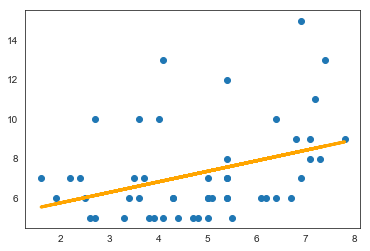

In [42]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y_regr = df['td'].values.reshape(-1, 1)
X_regr = df['receptions_game'].values.reshape(-1, 1)
regr.fit(X_regr, Y_regr)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_regr, Y_regr))

#Plot the output
plt.scatter(X_regr, Y_regr)
plt.plot(X_regr, regr.predict(X_regr), color='orange', linewidth=3)
plt.show()

## KNN

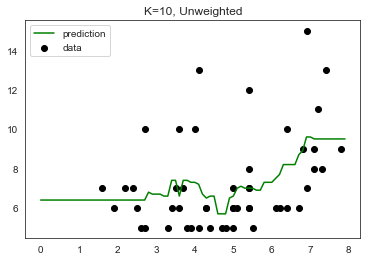

In [43]:
## Unweighted

from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X_knn = pd.DataFrame(df.receptions_game)
Y_knn = df.td
knn.fit(X_knn, Y_knn)

# Set up our prediction line.
T = np.arange(0, 8, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X_knn, Y_knn, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

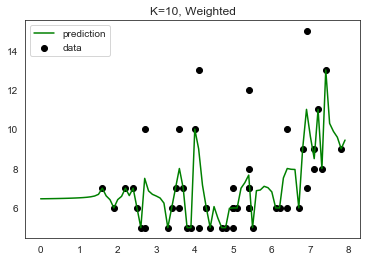

In [44]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X_knn_w = pd.DataFrame(df.receptions_game)
Y_knn_w = df.td
knn_w.fit(X_knn_w, Y_knn_w)

# Set up our prediction line.
T = np.arange(0, 8, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X_knn_w, Y_knn_w, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_knn, Y_knn, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_knn_w, Y_knn_w, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -8.11 (+/- 14.69)
Weighted Accuracy: -14.85 (+/- 21.34)


### It looks like these aren't exactly the mostly reliable parameters for prediction, maybe I should take a look at a heatmap and try again.

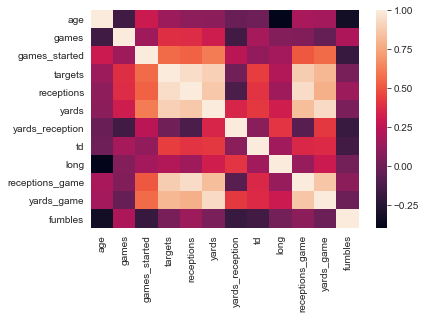

In [46]:
sns.heatmap(df.corr())

### I think maybe we should look at something more highly correlated, like yards and targets


Coefficients: 
 [[9.18035264]]

Intercept: 
 [-67.15908208]

R-squared:
0.8079458116454632


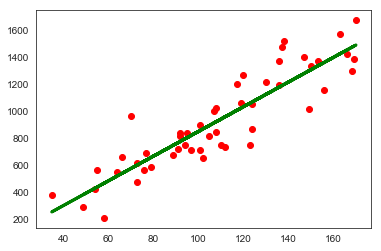

In [51]:
##Linear regression

# Instantiate and fit our model.
regr2 = linear_model.LinearRegression()
Y_regr2 = df['yards'].values.reshape(-1, 1)
X_regr2 = df['targets'].values.reshape(-1, 1)
regr2.fit(X_regr2, Y_regr2)

# Inspect the results.
print('\nCoefficients: \n', regr2.coef_)
print('\nIntercept: \n', regr2.intercept_)
print('\nR-squared:')
print(regr.score(X_regr2, Y_regr2))

#Plot the output
plt.scatter(X_regr2, Y_regr2, color='red')
plt.plot(X_regr2, regr.predict(X_regr2), color='green', linewidth=3)
plt.show()

#I'm definitely seeing more predictive power here.

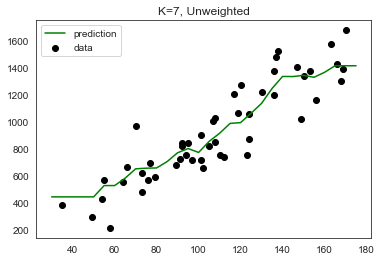

In [57]:
## Unweighted

# Build our model.
knn2 = neighbors.KNeighborsRegressor(n_neighbors=7)
X_knn2 = pd.DataFrame(df.targets)
Y_knn2 = df.yards
knn2.fit(X_knn2, Y_knn2)

# Set up our prediction line.
T = np.arange(30, 180, 5)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn2.predict(T)

plt.scatter(X_knn2, Y_knn2, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=7, Unweighted')
plt.show()

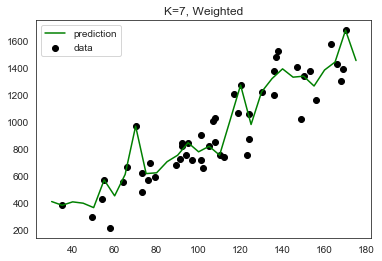

In [59]:
# Run the same model, this time with weights.
knn_w2 = neighbors.KNeighborsRegressor(n_neighbors=7, weights='distance')
X_knn_w2 = pd.DataFrame(df.targets)
Y_knn_w2 = df.yards
knn_w2.fit(X_knn_w2, Y_knn_w2)

# Set up our prediction line.
T = np.arange(30, 180, 5)[:, np.newaxis]

Y_ = knn_w2.predict(T)

plt.scatter(X_knn_w2, Y_knn_w2, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=7, Weighted')
plt.show()

In [61]:
score2 = cross_val_score(knn2, X_knn2, Y_knn2, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
score_w2 = cross_val_score(knn_w2, X_knn_w2, Y_knn_w2, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w2.mean(), score_w2.std() * 2))

Unweighted Accuracy: 0.59 (+/- 0.28)
Weighted Accuracy: 0.62 (+/- 0.22)




#### For this particular dataset, I think the pros of using KNN outweigh what might be the cons for a larger dataset that might require more process power. Because we're only looking at the top 50 players by TD receptions in the NFL during the 2018 season, we should be able to process the distance calculations without any kind of problem.

#### If we want to better train our simple linear regression for some stronger predictive power, we can certain do so, but it would require a bit more effort in the preliminary set-up; performing transformations to generate a more linear relationship between datapoints and eliminating outliers (in this case, there are many) to have a greater sense of multivariate normality.

#### Simple linear regression, in terms of visualization, however, can definitely give the user some quick insight into how linear and normal the data is going to look.